# Multivariate Time Series Manipulation & Visualization

## Overview

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 333px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Output: Accumulated Generation</th>
            <th>Output: Technology Relationship</th>
            <th>Input: Hourly Energy Generation</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/03_output_2.png" alt="Solar Image 1">
            </td>
            <td>
                <img src="src/03_output_1.png" alt="Solar Image 2">
            </td>
            <td>
                <img src="src/03_input.png" alt="Solar Image 3">
            </td>
        </tr>
    </tbody>
</table>


## Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('../../../data/energy_generation_hourly_year.csv', index_col=0, parse_dates=True)
df

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
time,,,,,,,,,,,
2022-09-01 00:00:00,695.00,1155.1,14748.950,4387.050,899.675,273.7,6869.9,201.600,516.600,1.000,287.7
2022-09-01 01:00:00,750.00,1162.1,14255.600,4008.900,850.200,271.6,6881.9,117.700,514.400,1.000,247.7
2022-09-01 02:00:00,777.50,1153.9,13644.750,3547.500,798.100,272.6,6873.9,78.000,512.700,1.200,239.7
2022-09-01 03:00:00,802.50,1146.0,13736.500,3188.650,795.500,273.0,6879.9,78.000,512.500,0.200,209.7
2022-09-01 04:00:00,816.25,1152.8,13706.825,2594.225,821.600,271.7,6873.9,78.100,513.100,0.400,231.5
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 19:00:00,472.50,2084.9,9390.275,2780.800,2335.900,228.4,6853.0,1611.600,493.575,5212.173,1691.6
2023-08-31 20:00:00,455.00,2141.1,10097.725,3072.800,3860.400,230.9,6857.0,1910.850,500.600,861.975,1039.1
2023-08-31 21:00:00,509.10,2149.1,11359.425,3057.150,3852.325,236.9,6864.0,1343.375,505.100,21.400,668.8


<Axes: xlabel='time'>

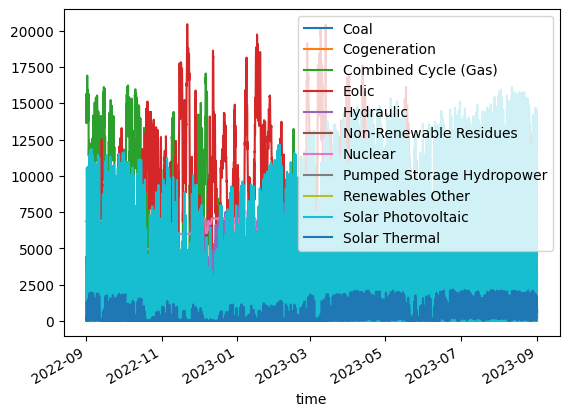

In [2]:
df.plot()

## Resampling the Time
- [Date offset `rule` list](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects)
- [Pandas plot `kind` list](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Daily

<Axes: xlabel='time'>

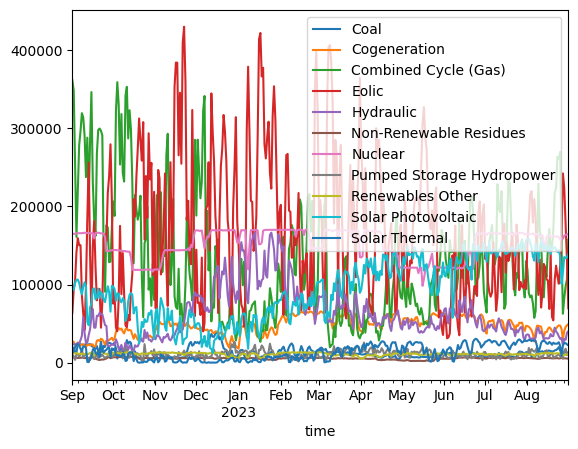

In [3]:
df.resample('D').sum().plot()

### Monthly

<Axes: xlabel='time'>

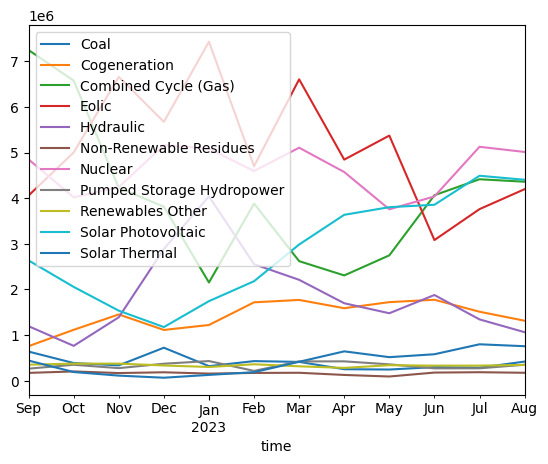

In [4]:
df.resample('ME').sum().plot()

<Axes: xlabel='time'>

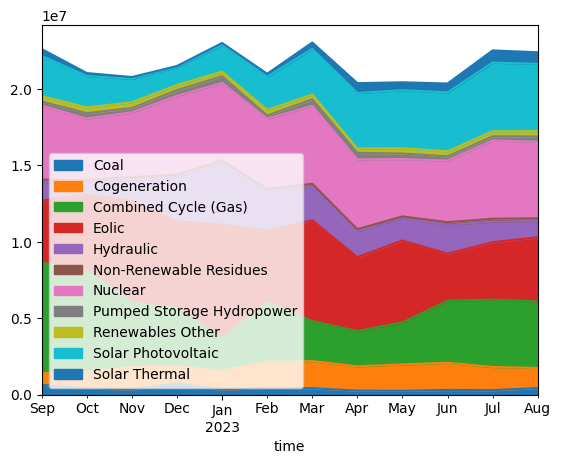

In [6]:
df.resample('ME').sum().plot.area()

<Axes: xlabel='time'>

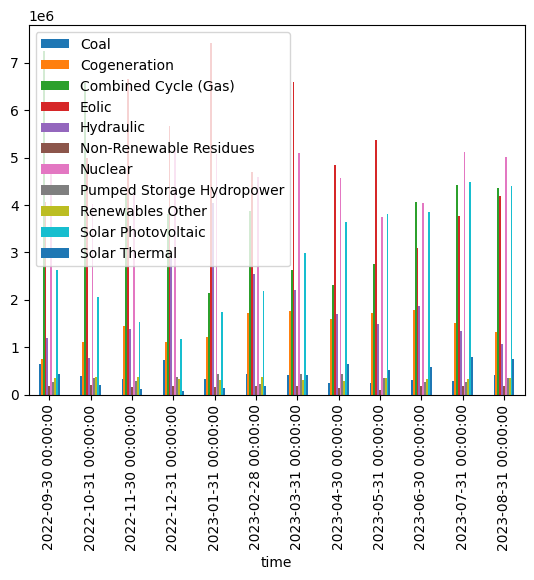

In [7]:
df.resample('ME').sum().plot.bar()

## Visualize Time Series Correlation

In [10]:
df_weekly = df.resample('7D').mean()

<Axes: xlabel='Coal', ylabel='Eolic'>

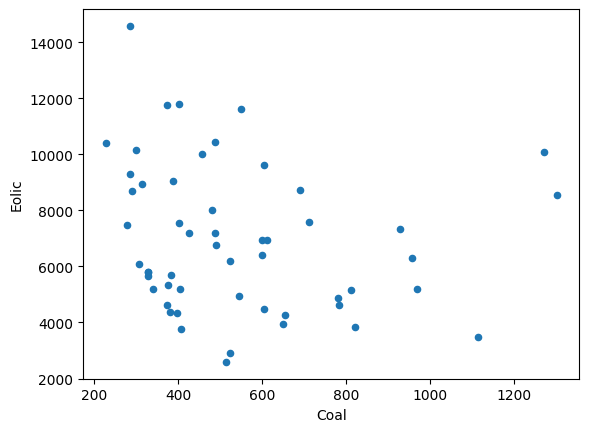

In [12]:
df_weekly.plot.scatter(x='Coal', y='Eolic')

<Axes: xlabel='Hydraulic', ylabel='Eolic'>

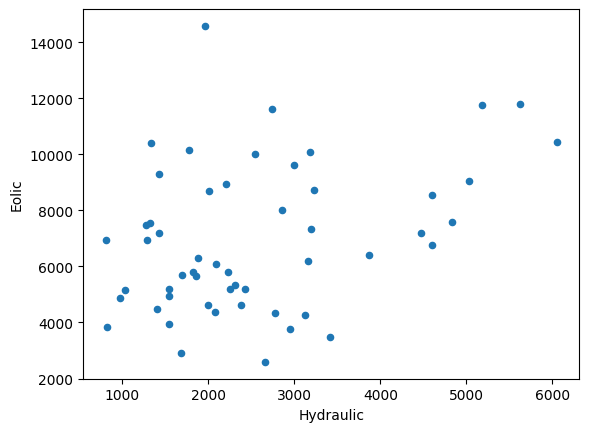

In [13]:
df_weekly.plot.scatter(x='Hydraulic', y='Eolic')

## Correlation Matrix

- [Plotly Express Overview](https://plotly.com/python/plotly-express/#overview)

### Scatter Matrix

In [15]:
import plotly.express as px
px.scatter_matrix(df_weekly, height=800, width=800)

### Correlation Heatmap

In [22]:
dff = df_weekly.corr()
dff.style

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
Coal,1.000000,-0.341330,0.487464,-0.176352,0.120366,0.403748,0.390050,-0.269178,0.389689,-0.385212,-0.300069
Cogeneration,-0.341330,1.000000,-0.322895,-0.094021,0.072920,-0.208132,-0.199551,-0.169225,0.125703,0.352743,0.201751
Combined Cycle (Gas),0.487464,-0.322895,1.000000,-0.559629,-0.472859,0.495032,-0.028002,-0.590943,0.620094,-0.054335,-0.031272
Eolic,-0.176352,-0.094021,-0.559629,1.000000,0.359391,-0.231582,0.024881,0.351755,-0.255997,-0.485329,-0.441440
Hydraulic,0.120366,0.072920,-0.472859,0.359391,1.000000,-0.056570,0.397157,0.228756,-0.253956,-0.440798,-0.460564
Non-Renewable Residues,0.403748,-0.208132,0.495032,-0.231582,-0.056570,1.000000,0.322821,-0.332761,0.275271,-0.249293,-0.206852
Nuclear,0.390050,-0.199551,-0.028002,0.024881,0.397157,0.322821,1.000000,0.114866,-0.179829,-0.038945,0.071226
Pumped Storage Hydropower,-0.269178,-0.169225,-0.590943,0.351755,0.228756,-0.332761,0.114866,1.000000,-0.771008,-0.006017,0.060263
Renewables Other,0.389689,0.125703,0.620094,-0.255997,-0.253956,0.275271,-0.179829,-0.771008,1.000000,-0.184570,-0.241586
Solar Photovoltaic,-0.385212,0.352743,-0.054335,-0.485329,-0.440798,-0.249293,-0.038945,-0.006017,-0.184570,1.000000,0.961043


In [33]:
px.imshow(dff, height=800, width=800, text_auto='.2f', color_continuous_scale='RdBu')

## Other Plots

In [41]:
px.line(df_weekly, x=df_weekly.index, y=df_weekly.columns, height=500, width=700)

In [42]:
px.area(df_weekly, x=df_weekly.index, y=df_weekly.columns, height=500, width=700)

In [43]:
px.bar(df_weekly, x=df_weekly.index, y=df_weekly.columns, height=500, width=700)

## Pivot Tables

### Transform object to DataFrame

> Only if you don't have a DataFrame yet.

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
time,,,,,,,,,,,
2022-09-01 00:00:00,695.0,1155.1,14748.950,4387.050,899.675,273.7,6869.9,201.60,516.6,1.0,287.7
2022-09-01 01:00:00,750.0,1162.1,14255.600,4008.900,850.200,271.6,6881.9,117.70,514.4,1.0,247.7
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 22:00:00,477.5,2153.4,10575.375,3057.950,3541.400,239.4,6866.0,946.25,510.7,17.6,607.9
2023-08-31 23:00:00,500.0,2127.7,9988.875,3028.675,3159.500,240.8,6869.0,334.95,511.9,17.4,619.8


### Time series categories in one column

In [44]:
dff = df.melt(ignore_index=False, value_name='generation', var_name='technology')
dff

,technology,generation
time,,
2022-09-01 00:00:00,Coal,695.00
2022-09-01 01:00:00,Coal,750.00
2022-09-01 02:00:00,Coal,777.50
2022-09-01 03:00:00,Coal,802.50
2022-09-01 04:00:00,Coal,816.25
...,...,...
2023-08-31 19:00:00,Solar Thermal,1691.60
2023-08-31 20:00:00,Solar Thermal,1039.10
2023-08-31 21:00:00,Solar Thermal,668.80


### Create columns with datetime information

In [45]:
dff = dff.assign(
    year=dff.index.year,
    month=dff.index.month,
    day=dff.index.day,
    hour=dff.index.hour
)

### Process `pivot_table`

- Use this methodology.

In [49]:
dff = dff.pivot_table(values='generation', index='technology', columns=['year','month'], aggfunc='sum')

KeyError: 'generation'

In [50]:
dff.style

### Style DataFrame

In [55]:
dff.div(1000000).sort_values(by=(2022,9),ascending=False).style.background_gradient(cmap='Oranges').format(precision=2)